In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'C:\Users\rathi\course8-Renaissa\Nanolasers_Dataset.csv')
data

,laser_type,cavity_type,material_system,pump_type,wavelength_nm,quality_factor,modal_volume_lambda_cubed,threshold_kW_per_cm2,device_length_um,cavity_size_nm,electrical_drive_possible,estimated_fabrication_hours,room_temp_operation,integration_risk_band
0,Photonic Crystal,1D,GaAs,Optical,968.9,114686,1.068,0.234,7,70,0,27.44,0,Low
1,Photonic Crystal,2D,PbO glass + dye,Optical,979.0,127874,1.438,0.376,11,87,0,34.09,0,Low
2,Nanowire,Core-Shell,GaAs/AlGaAs,Optical,853.5,48935,2.063,0.242,11,385,0,31.81,0,Low
3,Plasmonic,MIS,III-V,Optical,852.2,7672,0.267,2.753,17,85,1,98.64,1,High
4,Plasmonic,MIM,II-VI,Optical,819.9,9564,0.309,1.840,29,158,1,78.41,1,High
5,Plasmonic,Spaser,Core-Shell,Optical,908.1,8113,0.203,2.249,6,170,1,79.08,1,High
6,Plasmonic,Plasmonic Crystal,Metal NP + dye/polymer,Optical,650.0,7218,0.190,2.703,14,262,1,98.81,0,High
7,Polariton,Waveguide FP,ITO/Au gratings + excitons,Electrical,1162.1,20508,0.863,0.111,17,202,1,20.90,1,Low
8,Photonic Crystal,1D,GaAs,Optical,989.2,82709,1.823,0.343,20,131,0,41.31,0,Low
9,Photonic Crystal,2D,PbO glass + dye,Optical,912.5,87042,1.482,0.191,12,183,0,33.14,0,Low


In [3]:
data.dtypes

laser_type                      object
cavity_type                     object
material_system                 object
pump_type                       object
wavelength_nm                  float64
quality_factor                   int64
modal_volume_lambda_cubed      float64
threshold_kW_per_cm2           float64
device_length_um                 int64
cavity_size_nm                   int64
electrical_drive_possible        int64
estimated_fabrication_hours    float64
room_temp_operation              int64
integration_risk_band           object
dtype: object

In [4]:
data.columns

Index(['laser_type', 'cavity_type', 'material_system', 'pump_type',
       'wavelength_nm', 'quality_factor', 'modal_volume_lambda_cubed',
       'threshold_kW_per_cm2', 'device_length_um', 'cavity_size_nm',
       'electrical_drive_possible', 'estimated_fabrication_hours',
       'room_temp_operation', 'integration_risk_band'],
      dtype='object')

In [5]:
for i in data.columns:
    print(data[i].unique())

['Photonic Crystal' 'Nanowire' 'Plasmonic' 'Polariton']
['1D' '2D' 'Core-Shell' 'MIS' 'MIM' 'Spaser' 'Plasmonic Crystal'
 'Waveguide FP']
['GaAs' 'PbO glass + dye' 'GaAs/AlGaAs' 'III-V' 'II-VI' 'Core-Shell'
 'Metal NP + dye/polymer' 'ITO/Au gratings + excitons']
['Optical' 'Electrical']
[ 968.9  979.   853.5  852.2  819.9  908.1  650.  1162.1  989.2  912.5
  973.   703.7  750.   890.8  978.1  908.   724.2  873.4  743.2 1012.3
 1063.   932.1  805.3  974.8  957.3  999.7  785.   902.8  990.6  799.2
 1062.3  879.5  914.9  983.4  863.2  817.6  797.1  946.3 1077.3  989.
 1013.  1049.2  852.3  689.6  697.8  973.1]
[114686 127874  48935   7672   9564   8113   7218  20508  82709  87042
  43823   7280   9153   3946  32666 139257 101965  40865   7482   5752
   8533   6689  15529 134383 120844  78156  11269  10049   4736   6993
  35437  92231  92911  46137  10511   6342  10779   8543  42217  85952
  65675  43870   7158  10391   4200   9450  21520]
[1.068 1.438 2.063 0.267 0.309 0.203 0.19  0.863 1

In [6]:
# Create a copy of the numeric data to avoid modifying the original
no_outlier = data.copy()

def outlier_cleanup(col):
    # Calculate IQR and outlier fences
    q1 = no_outlier[col].quantile(0.25)
    q3 = no_outlier[col].quantile(0.75)
    iqr = q3 - q1
    lf = q1 - (1.5 * iqr)  # lower fence
    uf = q3 + (1.5 * iqr)  # upper fence

    # Check column type for proper handling of integer and float types
    col_type = str(no_outlier[col].dtype)

    # Apply outlier treatment
    if col_type in ["int64", "int32", "int16", "int8"]:
        # For integer columns, round the fence values and cast them to integers
        no_outlier.loc[no_outlier[col] < lf, col] = int(round(lf))
        no_outlier.loc[no_outlier[col] > uf, col] = int(round(uf))
    else:
        # For float columns, directly assign the fence values
        no_outlier.loc[no_outlier[col] < lf, col] = lf
        no_outlier.loc[no_outlier[col] > uf, col] = uf

# Apply outlier cleanup to specific columns
my_conti_cols = ['wavelength_nm', 'quality_factor', 'modal_volume_lambda_cubed',
       'threshold_kW_per_cm2', 'device_length_um', 'cavity_size_nm', 'estimated_fabrication_hours']
for col in my_conti_cols:
    outlier_cleanup(col)

no_outlier

,laser_type,cavity_type,material_system,pump_type,wavelength_nm,quality_factor,modal_volume_lambda_cubed,threshold_kW_per_cm2,device_length_um,cavity_size_nm,electrical_drive_possible,estimated_fabrication_hours,room_temp_operation,integration_risk_band
0,Photonic Crystal,1D,GaAs,Optical,968.9,114686,1.068,0.234,7,70,0,27.44,0,Low
1,Photonic Crystal,2D,PbO glass + dye,Optical,979.0,127874,1.438,0.376,11,87,0,34.09,0,Low
2,Nanowire,Core-Shell,GaAs/AlGaAs,Optical,853.5,48935,2.063,0.242,11,385,0,31.81,0,Low
3,Plasmonic,MIS,III-V,Optical,852.2,7672,0.267,2.753,17,85,1,98.64,1,High
4,Plasmonic,MIM,II-VI,Optical,819.9,9564,0.309,1.840,29,158,1,78.41,1,High
5,Plasmonic,Spaser,Core-Shell,Optical,908.1,8113,0.203,2.249,6,170,1,79.08,1,High
6,Plasmonic,Plasmonic Crystal,Metal NP + dye/polymer,Optical,650.0,7218,0.190,2.703,14,262,1,98.81,0,High
7,Polariton,Waveguide FP,ITO/Au gratings + excitons,Electrical,1162.1,20508,0.863,0.111,17,202,1,20.90,1,Low
8,Photonic Crystal,1D,GaAs,Optical,989.2,82709,1.823,0.343,20,131,0,41.31,0,Low
9,Photonic Crystal,2D,PbO glass + dye,Optical,912.5,87042,1.482,0.191,12,183,0,33.14,0,Low


In [7]:
# Label Encoding in categorical columns
from sklearn import preprocessing

categ = data.select_dtypes(exclude="number")

for i in categ.columns:
    encoder = preprocessing.LabelEncoder()  # Encoder is the object of 'LabelEncoder'.
    no_outlier[i] = encoder.fit_transform(no_outlier[i])

no_outlier

,laser_type,cavity_type,material_system,pump_type,wavelength_nm,quality_factor,modal_volume_lambda_cubed,threshold_kW_per_cm2,device_length_um,cavity_size_nm,electrical_drive_possible,estimated_fabrication_hours,room_temp_operation,integration_risk_band
0,1,0,1,1,968.9,114686,1.068,0.234,7,70,0,27.44,0,1
1,1,1,7,1,979.0,127874,1.438,0.376,11,87,0,34.09,0,1
2,0,2,2,1,853.5,48935,2.063,0.242,11,385,0,31.81,0,1
3,2,4,4,1,852.2,7672,0.267,2.753,17,85,1,98.64,1,0
4,2,3,3,1,819.9,9564,0.309,1.840,29,158,1,78.41,1,0
5,2,6,0,1,908.1,8113,0.203,2.249,6,170,1,79.08,1,0
6,2,5,6,1,650.0,7218,0.190,2.703,14,262,1,98.81,0,0
7,3,7,5,0,1162.1,20508,0.863,0.111,17,202,1,20.90,1,1
8,1,0,1,1,989.2,82709,1.823,0.343,20,131,0,41.31,0,1
9,1,1,7,1,912.5,87042,1.482,0.191,12,183,0,33.14,0,1


In [8]:
from sklearn.preprocessing import MinMaxScaler

def my_scaling(col):
    my_scaling_obj = MinMaxScaler()
    no_outlier[col] = pd.DataFrame(my_scaling_obj.fit_transform(no_outlier[col].to_numpy().reshape(-1,1)))
    return no_outlier[col]
my_numerical_cols = ['wavelength_nm', 'quality_factor', 'modal_volume_lambda_cubed',
       'threshold_kW_per_cm2', 'device_length_um', 'cavity_size_nm', 'estimated_fabrication_hours']
for i in my_numerical_cols:
    no_outlier[i] = my_scaling(i)
no_outlier

,laser_type,cavity_type,material_system,pump_type,wavelength_nm,quality_factor,modal_volume_lambda_cubed,threshold_kW_per_cm2,device_length_um,cavity_size_nm,electrical_drive_possible,estimated_fabrication_hours,room_temp_operation,integration_risk_band
0,1,0,1,1,0.622730,0.818411,0.343198,0.077289,0.185185,0.024768,0,0.154183,0,1
1,1,1,7,1,0.642453,0.915875,0.485396,0.129304,0.333333,0.077399,0,0.232994,0,1
2,0,2,2,1,0.397383,0.332486,0.725596,0.080220,0.333333,1.000000,0,0.205973,0,1
3,2,4,4,1,0.394845,0.027537,0.035357,1.000000,0.555556,0.071207,1,0.997985,1,0
4,2,3,3,1,0.331771,0.041519,0.051499,0.665568,1.000000,0.297214,1,0.758237,1,0
5,2,6,0,1,0.504003,0.030796,0.010761,0.815385,0.148148,0.334365,1,0.766177,1,0
6,2,5,6,1,0.000000,0.024181,0.005765,0.981685,0.444444,0.619195,1,1.000000,0,0
7,3,7,5,0,1.000000,0.122400,0.264412,0.032234,0.555556,0.433437,1,0.076677,1,1
8,1,0,1,1,0.662371,0.582089,0.633359,0.117216,0.666667,0.213622,0,0.318559,0,1
9,1,1,7,1,0.512595,0.614111,0.502306,0.061538,0.370370,0.374613,0,0.221735,0,1


# Multiple Linear Regression

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  # y = m1*x1 + m2*x2 + m3*x3 + m4*x4 + m5*x5 + c + e (Multiple Linear Regression)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [10]:
my_corr = no_outlier.corr()[['estimated_fabrication_hours']].sort_values(by='estimated_fabrication_hours', ascending=False)
my_corr

,estimated_fabrication_hours
estimated_fabrication_hours,1.000000
threshold_kW_per_cm2,0.965293
pump_type,0.545298
electrical_drive_possible,0.509130
room_temp_operation,0.356098
laser_type,0.145583
cavity_type,0.145465
cavity_size_nm,0.108789
device_length_um,0.076328
material_system,-0.173815


In [11]:
# Check multi-colinearity between independent variables using the VIF score.

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [13]:
no_hours = no_outlier.drop("estimated_fabrication_hours", axis=1)
no_hours

,laser_type,cavity_type,material_system,pump_type,wavelength_nm,quality_factor,modal_volume_lambda_cubed,threshold_kW_per_cm2,device_length_um,cavity_size_nm,electrical_drive_possible,room_temp_operation,integration_risk_band
0,1,0,1,1,0.622730,0.818411,0.343198,0.077289,0.185185,0.024768,0,0,1
1,1,1,7,1,0.642453,0.915875,0.485396,0.129304,0.333333,0.077399,0,0,1
2,0,2,2,1,0.397383,0.332486,0.725596,0.080220,0.333333,1.000000,0,0,1
3,2,4,4,1,0.394845,0.027537,0.035357,1.000000,0.555556,0.071207,1,1,0
4,2,3,3,1,0.331771,0.041519,0.051499,0.665568,1.000000,0.297214,1,1,0
5,2,6,0,1,0.504003,0.030796,0.010761,0.815385,0.148148,0.334365,1,1,0
6,2,5,6,1,0.000000,0.024181,0.005765,0.981685,0.444444,0.619195,1,0,0
7,3,7,5,0,1.000000,0.122400,0.264412,0.032234,0.555556,0.433437,1,1,1
8,1,0,1,1,0.662371,0.582089,0.633359,0.117216,0.666667,0.213622,0,0,1
9,1,1,7,1,0.512595,0.614111,0.502306,0.061538,0.370370,0.374613,0,0,1


In [14]:
no_of_cols = no_hours.shape[1]
no_of_cols

13

In [15]:
def myVIF(x):
    vif = pd.Series(name="vif")
    for i in range(0, no_of_cols):
        vif[x.columns[i]] = variance_inflation_factor(x.values, i)
    return vif

vif_values = myVIF(no_hours)
print(vif_values)

laser_type                    44.505194
cavity_type                    9.302972
material_system                1.384842
pump_type                     23.780545
wavelength_nm                  1.782198
quality_factor                11.685073
modal_volume_lambda_cubed     14.920171
threshold_kW_per_cm2           7.859166
device_length_um               1.341776
cavity_size_nm                 1.428330
electrical_drive_possible    300.510636
room_temp_operation            1.629701
integration_risk_band         76.502120
Name: vif, dtype: float64


In [149]:
# We should take the columns in which VIF scores are less than 10 (preferably less than 5).
# We are taking 3 independent columns: 'threshold_kW_per_cm2', 'room_temp_operation', and 'wavelength_nm' (based on correlation with the target column and VIF score).

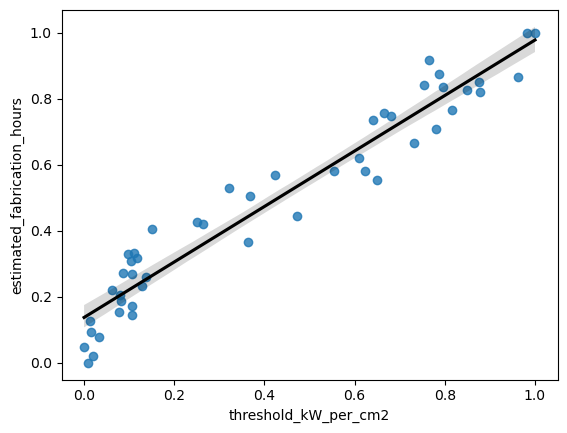

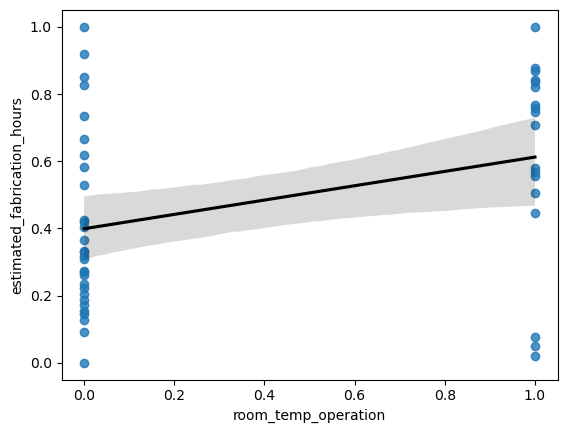

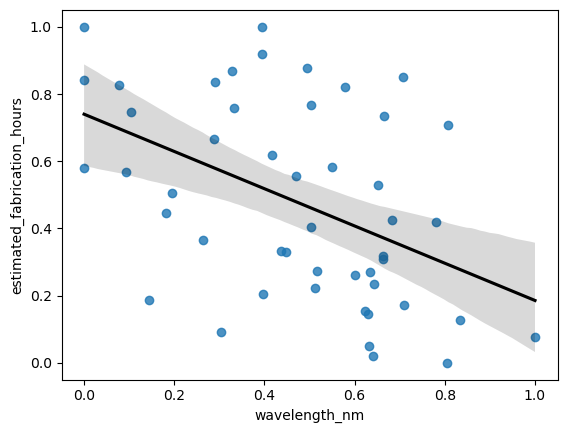

In [17]:
my_cols = ['threshold_kW_per_cm2', 'room_temp_operation', 'wavelength_nm']
for i in my_cols:
    sns.regplot(x=i, y="estimated_fabrication_hours", data=no_outlier, line_kws={"color":"black"})
    plt.show()

In [18]:
x_new = no_outlier[['threshold_kW_per_cm2', 'room_temp_operation', 'wavelength_nm']].to_numpy().reshape(-1,3)
x_new

array([[0.07728938, 0.        , 0.62272994],
       [0.12930403, 0.        , 0.64245265],
       [0.08021978, 0.        , 0.39738332],
       [1.        , 1.        , 0.39484476],
       [0.66556777, 1.        , 0.33177114],
       [0.81538462, 1.        , 0.50400312],
       [0.98168498, 0.        , 0.        ],
       [0.03223443, 1.        , 1.        ],
       [0.11721612, 0.        , 0.66237063],
       [0.06153846, 0.        , 0.5125952 ],
       [0.10549451, 0.        , 0.63073618],
       [0.75274725, 1.        , 0.        ],
       [0.68021978, 1.        , 0.10486233],
       [0.36886447, 1.        , 0.19527436],
       [0.65054945, 1.        , 0.47022066],
       [0.01978022, 1.        , 0.64069518],
       [0.15054945, 0.        , 0.50380785],
       [0.08131868, 0.        , 0.14489358],
       [0.11172161, 0.        , 0.43624292],
       [0.47179487, 1.        , 0.1819957 ],
       [0.87545788, 0.        , 0.70747901],
       [0.77948718, 1.        , 0.80648311],
       [0.

In [19]:
y_new = np.array(no_outlier["estimated_fabrication_hours"]).reshape(-1,1)
y_new

array([[0.15418346],
       [0.2329936 ],
       [0.20597298],
       [0.9979853 ],
       [0.75823655],
       [0.76617682],
       [1.        ],
       [0.07667694],
       [0.3185589 ],
       [0.22173501],
       [0.14576914],
       [0.8422612 ],
       [0.74780754],
       [0.50604409],
       [0.55498933],
       [0.01919886],
       [0.4041242 ],
       [0.18807774],
       [0.33147665],
       [0.44477364],
       [0.84937189],
       [0.70810619],
       [0.5814174 ],
       [0.09184641],
       [0.26878407],
       [0.26048827],
       [0.42545627],
       [0.36501541],
       [0.87591846],
       [0.73560085],
       [0.83621711],
       [0.        ],
       [0.33064707],
       [0.27281346],
       [0.52950936],
       [0.61898554],
       [0.86738564],
       [0.66556056],
       [0.81986253],
       [0.12739986],
       [0.30741882],
       [0.17290827],
       [0.41964921],
       [0.91763451],
       [0.82543257],
       [0.56921071],
       [0.58046931],
       [0.048

In [20]:
x_new_train, x_new_test, y_new_train, y_new_test = train_test_split(x_new, y_new, train_size = 0.7, random_state = 0)

In [21]:
# 'multi' is the name of the trained model.

In [22]:
model = LinearRegression()  # Step 1: Build a model using an algorithm.
multi = model.fit(x_new_train, y_new_train)  # Step 2: Fit the model. # Here, we are building the model and training it in the same line.

In [23]:
# Step 3: Check training performance of the model.
r_square = multi.score(x_new_train, y_new_train)
print("R-square:", r_square)  # Training model performance is 72.7%, which is good. A bad model will not give good results.

R-square: 0.9508683527432049


In [24]:
# Step 4: Predict through unseen data using predict().
y_new_pred = multi.predict(x_new_test)  # We are predicting the values of y_test and storing it as 'y_prediction'. The input is given by passing the input as x_test -> if not matching, it is an error or residual (for numerical columns).
y_new_pred  # This is predicting and comparing with 'y_new_test' values.

array([[0.68627854],
       [0.66486532],
       [0.35500365],
       [0.77856698],
       [0.23698556],
       [0.78228339],
       [0.41694512],
       [0.23160607],
       [0.0936339 ],
       [0.23409819],
       [0.7554599 ],
       [0.14326758],
       [0.22358146],
       [0.47142884],
       [0.08467069]])

In [25]:
mse = mean_squared_error(y_new_test, y_new_pred)
print("MSE:", mse)  # Smaller errors are better. Example: 2 is better than 2000 errors in case of MSE. MSE is numerical, not %, all errors are %.

MSE: 0.007429566619920674


In [26]:
# Step 5: Check testing (r_square) performance of the model. -> Checks the reliability of the model.
r2_new = r2_score(y_new_test, y_new_pred)
print("New R-squared:", r2_new)  # The model performance is 73%, which is still good.

New R-squared: 0.9063847376200893


In [27]:
# Linear regression works better when there is more than one input column.

In [28]:
multi.intercept_  # The linear regression model gives the intercept value.

array([0.17597011])

In [29]:
multi.coef_  # Since we have taken 4 independent variables, we get 4 slopes for each line of best fit.

array([[ 0.84930329, -0.05982093, -0.04989209]])

In [30]:
# Create a table containing residuals.
df_residual = pd.DataFrame()  # Creating an empty DataFrame
df_residual["y_pred"] = pd.DataFrame(y_new_pred)  # 'y_pred' - Creating a new column
# Assigning all 'y_new_pred' values to a 'y_pred' column in a DataFrame

In [31]:
df_residual["y_actual"] = pd.DataFrame(y_new_test)

In [32]:
# Residual = |Predicted - Actual|
df_residual["Residual"] = abs(df_residual["y_pred"] - df_residual["y_actual"])  # Error is calculated for each row.
df_residual  # Table with actual, predicted, and residual values

,y_pred,y_actual,Residual
0,0.686279,0.735601,0.049322
1,0.664865,0.758237,0.093371
2,0.355004,0.425456,0.070453
3,0.778567,0.836217,0.057650
4,0.236986,0.330647,0.093662
5,0.782283,0.665561,0.116723
6,0.416945,0.529509,0.112564
7,0.231606,0.307419,0.075813
8,0.093634,0.076677,0.016957
9,0.234098,0.145769,0.088329


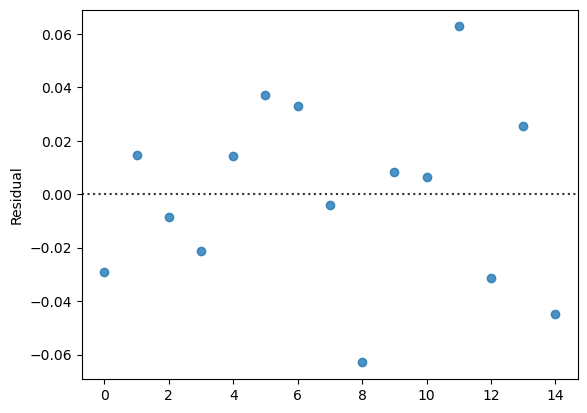

In [33]:
# Check if the assumption 'Homascedasticity' is applicable for this model.
sns.residplot(x = df_residual.index, y = "Residual", data = df_residual);

In [34]:
# According to the 'Residual' visual, homoscedasticity is followed.

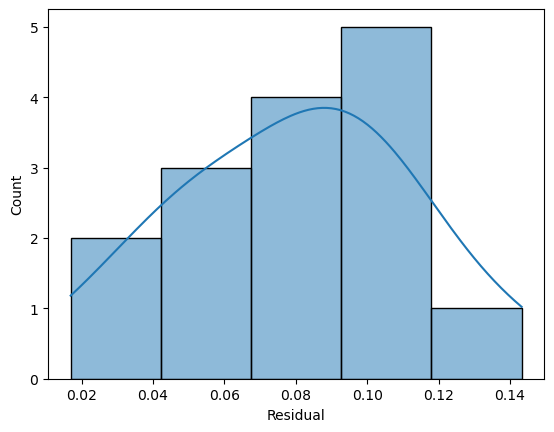

In [35]:
# Assumption normality of residuals
sns.histplot(df_residual["Residual"], kde=True);

In [36]:
# The assumption holds because the errors are approximately normal. Although not perfectly normal, the deviations are minor and acceptable for regression.

# Logistic Regression

In [37]:
len(no_outlier)

48

In [38]:
# Target column = 'estimated_fabrication_hours' is to be predicted. So, it will be considered as a dependent column.
# All other columns except for the column 'estimated_fabrication_hours' will be independent.

In [39]:
# We split the table into 4 parts that are called:
# x_train (training independent)
# x_test (testing independent)
# y_train (training dependent)
# y_test (testing dependent)

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import roc_curve

In [41]:
data['estimated_fabrication_hours'].unique()

array([27.44, 34.09, 31.81, 98.64, 78.41, 79.08, 98.81, 20.9 , 41.31,
       33.14, 26.73, 85.5 , 77.53, 57.13, 61.26, 16.05, 48.53, 30.3 ,
       42.4 , 51.96, 86.1 , 74.18, 63.49, 22.18, 37.11, 36.41, 50.33,
       45.23, 88.34, 76.5 , 84.99, 14.43, 42.33, 37.45, 59.11, 66.66,
       87.62, 70.59, 83.61, 25.18, 40.37, 29.02, 49.84, 91.86, 84.08,
       62.46, 63.41, 18.54])

In [42]:
no_outlier['estimated_fabrication_hours'].unique()

array([0.15418346, 0.2329936 , 0.20597298, 0.9979853 , 0.75823655,
       0.76617682, 1.        , 0.07667694, 0.3185589 , 0.22173501,
       0.14576914, 0.8422612 , 0.74780754, 0.50604409, 0.55498933,
       0.01919886, 0.4041242 , 0.18807774, 0.33147665, 0.44477364,
       0.84937189, 0.70810619, 0.5814174 , 0.09184641, 0.26878407,
       0.26048827, 0.42545627, 0.36501541, 0.87591846, 0.73560085,
       0.83621711, 0.        , 0.33064707, 0.27281346, 0.52950936,
       0.61898554, 0.86738564, 0.66556056, 0.81986253, 0.12739986,
       0.30741882, 0.17290827, 0.41964921, 0.91763451, 0.82543257,
       0.56921071, 0.58046931, 0.04870822])

High Absenteeism

Accuracy : 0.7
F1 Score : 0.5714285714285714
ROC-AUC  : 0.9047619047619048

Confusion Matrix:
 [[5 2]
 [1 2]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.50      0.67      0.57         3

    accuracy                           0.70        10
   macro avg       0.67      0.69      0.67        10
weighted avg       0.73      0.70      0.71        10



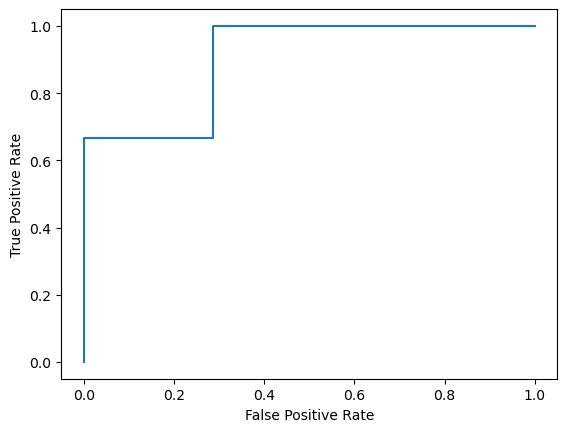

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.905


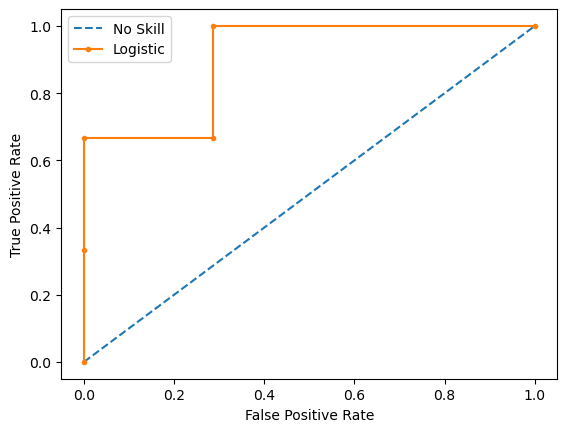

In [145]:
# Logistic Regression
# 1. Feature set
features = ['laser_type', 'pump_type', 'wavelength_nm', 'quality_factor', 'modal_volume_lambda_cubed',
       'threshold_kW_per_cm2', 'device_length_um', 'cavity_size_nm', 'estimated_fabrication_hours']
       # predict operation at room temperature because these factors relate to the physical, optical, and fabrication aspects that affect a nanolaser's 
       # ability to work reliably without active cooling and highlight the main traits that set room-temperature-capable nanolasers apart from those 
       # needing cryogenic conditions
x = no_outlier[features]
y = no_outlier['room_temp_operation']

# 2. Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=0)

# 3. Build and fit Logistic Regression model
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

# 4. Predict on test set
y_pred = logreg.predict(x_test)
y_prob = logreg.predict_proba(x_test)

# 5. Evaluation metrics
print("High Absenteeism")
print()
print("Accuracy :", accuracy_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))
print("ROC-AUC  :", roc_auc_score(y_test, logreg.predict_proba(x_test)[:,1]))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob[:,1], pos_label = 1)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

lr_probs = logreg.predict_proba(x_test)
ns_probs = [0 for _ in range(len(y_test))]  # We are using list comprehension.

# 6. ROC curve
lr_probs = lr_probs[:, 1]
# Calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# Summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# Calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# Plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# Add axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show the legend
plt.legend()
# Show the plot
plt.show()

# K-Nearest Neighbors

In [143]:
# Features: ["quality_factor", "modal_volume_lambda_cubed", "threshold_kW_per_cm2", "device_length_um", "cavity_size_nm"]
# They form natural laser groups: low-Q micron lasers, high-Q nanocavity lasers, and mid-power devices. They are perfect for clustering device groups.

48
6
1.0
[0 0 1 0 1 0 0 1 1 1 0 1 1 0 1]
[0 1]
6
6
[0.8666666666666667, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 1.0, 0.9333333333333333, 1.0, 1.0, 1.0, 0.8666666666666667, 0.7333333333333333]
[ 4  6  8 10 12 14 16 18 20 22 24 26 28]
0.9333333333333333


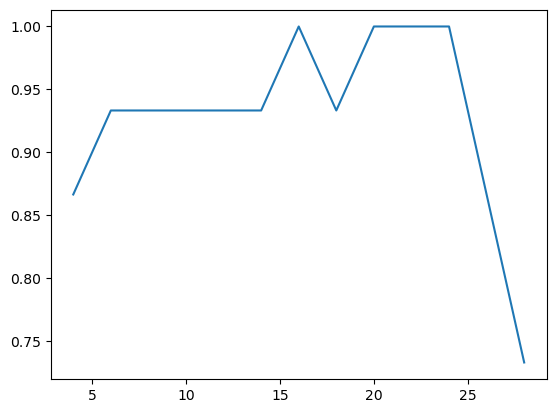

In [133]:
# Split again from the full processed data

# y: target variable is 'integration_risk_band'
y = no_outlier["integration_risk_band"]

# Drop target and irrelevant columns from features
x = no_outlier[["quality_factor", "modal_volume_lambda_cubed", "threshold_kW_per_cm2", "device_length_um",
    "cavity_size_nm"]]  # Gives the strongest separation between low, medium, and high integration risk

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=0)

n = len(no_outlier)  # number of elements (rows) in a dataset without any outliers (input variable)
print(n)
# Assume the value 'k' as the square root of the number of elements (rows) in an array
k = int(round(n)**0.5)
print(k)  # This is NOT the best value of 'k'.

from sklearn.neighbors import KNeighborsClassifier
my_knn = KNeighborsClassifier(6)  # k-value needs to be selected by the user (k = 6).
my_model_1 = my_knn.fit(x_train, y_train)  # Train the model.
print(my_model_1.score(x_train, y_train))

y_pred = my_model_1.predict(x_test)
print(y_pred)

my_model_1.classes_  # The class refers to unique values of the target column in a classification problem.
print(my_model_1.classes_)

my_model_1.n_neighbors
print(my_model_1.n_neighbors)

k2 = int(round(len(x_train)**0.5, 0))  # Initial but NOT final 'k'
print(k2)

# To find the value of 'k', we will create multiple temporary models.
accuracy = []
k_values = np.arange(4, 30, 2)
for my_k2 in k_values:
    temp = KNeighborsClassifier(my_k2)
    temp.fit(x_train, y_train)
    y2_pred = temp.predict(x_test)
    accuracy.append(accuracy_score(y_test, y2_pred))
print(accuracy)
print(k_values)

plt.plot(k_values, accuracy);

# By looking at the above plot, we will finalize the k-value as 6 to get maximum accuracy.
final_model = KNeighborsClassifier(k2)
final_model.fit(x_train, y_train)
y_pred = final_model.predict(x_test)
print(accuracy_score(y_test, y_pred))

# K-Means Clustering

In [141]:
# Target variable: "estimated_fabrication_hours"
# The chosen features form meaningful clusters that correspond to devices requiring shorter, moderate, or significantly longer fabrication times.

In [139]:
# Features: ["material_system", "quality_factor", "electrical_drive_possible", "room_temp_operation", "integration_risk_band"]
# They together represent the tech#nological complexity and manufacturing challenges of each nanolaser design, which is directly linked to the hours 
# needed for their production.

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\sit

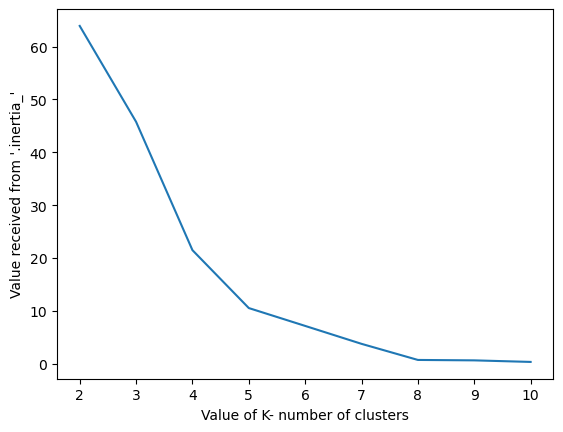

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\sit

For clusters = 2 , the silhouette score is 61.84
For clusters = 2 , the davies bouldin score is 0.53
For clusters = 2 , the calinski harabasz score is 138.28

For clusters = 3 , the silhouette score is 58.47
For clusters = 3 , the davies bouldin score is 0.52
For clusters = 3 , the calinski harabasz score is 171.49

For clusters = 4 , the silhouette score is 61.11
For clusters = 4 , the davies bouldin score is 0.49
For clusters = 4 , the calinski harabasz score is 170.87

For clusters = 5 , the silhouette score is 63.07
For clusters = 5 , the davies bouldin score is 0.44
For clusters = 5 , the calinski harabasz score is 250.23

For clusters = 6 , the silhouette score is 71.36
For clusters = 6 , the davies bouldin score is 0.36
For clusters = 6 , the calinski harabasz score is 308.61

For clusters = 7 , the silhouette score is 77.51
For clusters = 7 , the davies bouldin score is 0.29
For clusters = 7 , the calinski harabasz score is 456.26

For clusters = 8 , the silhouette score is 86.

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.6183727918618764
0.5847363494544073
0.5859367124477891


C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.6293567911513537
0.7136451613702012
0.7671819149106552


C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.869675429386688
0.8661068495981743


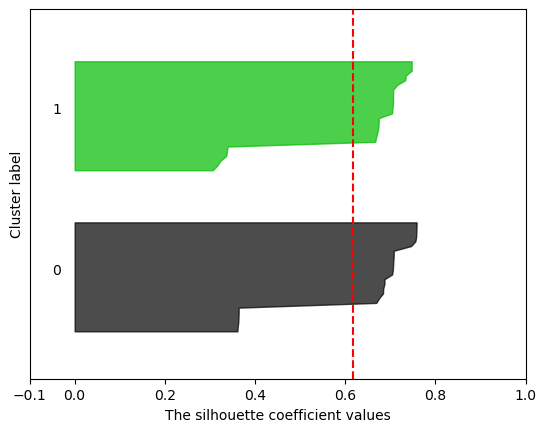

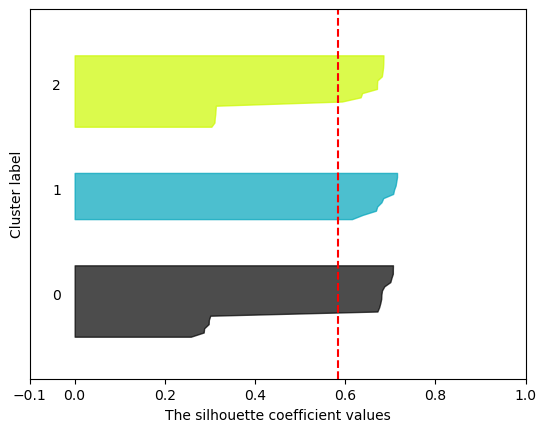

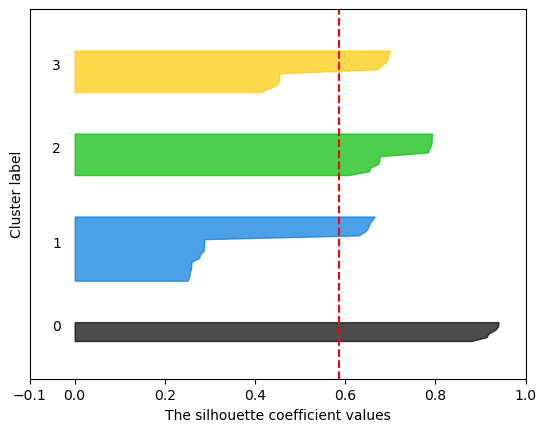

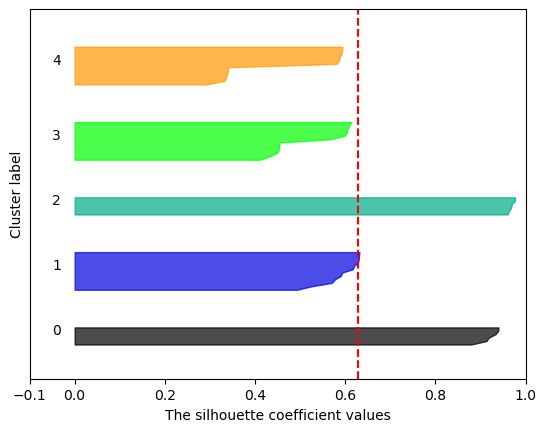

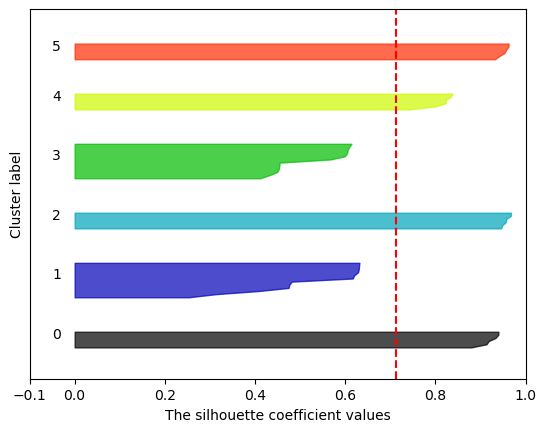

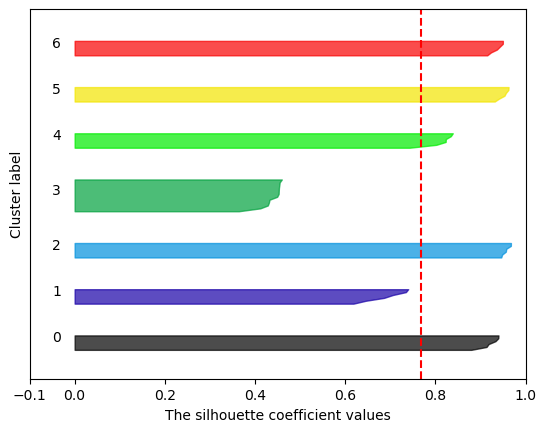

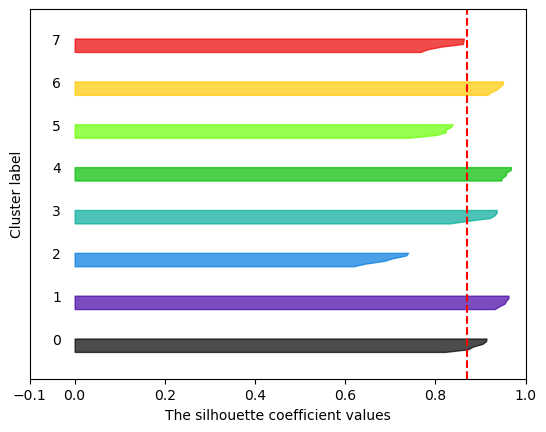

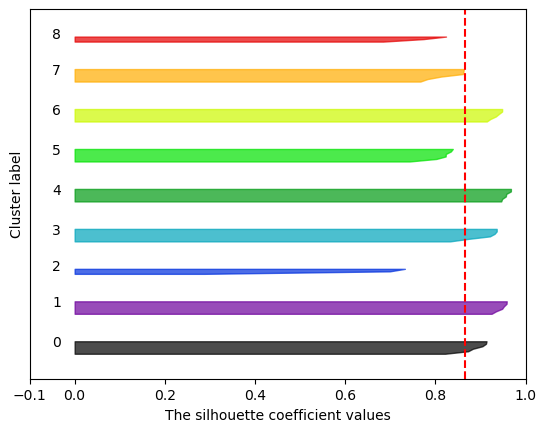

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


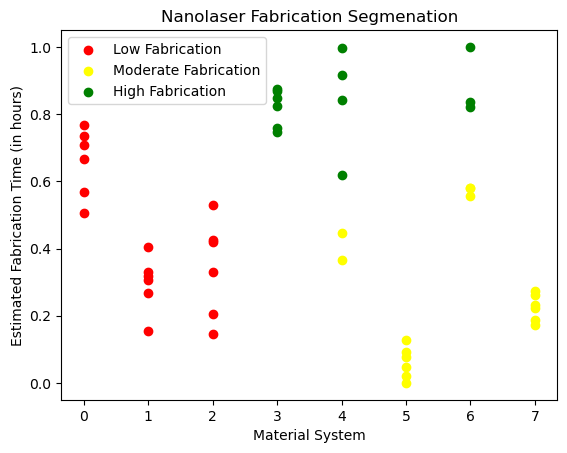

In [44]:
# Tasks 1-2 (Part 1): "material_system" vs. "estimated_fabrication_hours" Data

# K-Means Clustering
from sklearn.cluster import KMeans

X = np.array(no_outlier[["material_system", "estimated_fabrication_hours"]]).reshape(-1, 2)

err = []
my_cluster = np.arange(2, 11)
for k in my_cluster:
  temp = KMeans(n_clusters = k)
  temp.fit(X)
  err.append(temp.inertia_)  # '.inertia_' is provided to us in KMeans, it is the sum of squared distances of the samples.

# We will create an elbow curve to visualize data and find the most appropriate number of clusters.
plt.plot(my_cluster, err)
plt.xlabel("Value of K- number of clusters")
plt.ylabel("Value received from '.inertia_'")
plt.show()

# We will use other performance measures to see the appropriate number of clusters.
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

for j in my_cluster:
  temp_model = KMeans(n_clusters = j, random_state = 0)
  cluster_labels = temp_model.fit_predict(X)
  silhouette_avg = silhouette_score(X, cluster_labels) * 100
  print("For clusters =", j,",","the silhouette score is", round(silhouette_avg, 2))
  print("For clusters =", j,",","the davies bouldin score is", round(davies_bouldin_score(X, temp_model.labels_), 2))
  print("For clusters =", j,",","the calinski harabasz score is", round(calinski_harabasz_score(X, temp_model.labels_), 2))
  print()

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = range(2, 10)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical (v) line for average silhouette score of all the values
    sil_avg = silhouette_score(X, cluster_labels)
    print(sil_avg)
    ax1.axvline(x=sil_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

# Silhouette curve can help us find the suitable number of clusters.

# Let's finalize k=3, means that we need 3 groups.
# Apply KMeans
final_km = KMeans(n_clusters=3, random_state=0)
final_km.fit(X)
final_centroid = final_km.cluster_centers_
final_labels = final_km.labels_  # our final model

# Select relevant features for clustering
clustering_features = ["material_system", "estimated_fabrication_hours"]
clustering_data = no_outlier[clustering_features]

# Optional: scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(clustering_data)
clusters = final_km.fit_predict(X_scaled)

# Assign cluster labels
clustering_data = clustering_data.copy()
clustering_data['cluster'] = clusters

# Plot the clusters
segments = ["Low Fabrication", "Moderate Fabrication", "High Fabrication"]
colors = ["red", "yellow", "green"]

for i in range(3):
    plt.scatter(clustering_data.loc[clustering_data.cluster == i, "material_system"],
                clustering_data.loc[clustering_data.cluster == i, "estimated_fabrication_hours"],
                c=colors[i], label=segments[i])
plt.title("Nanolaser Fabrication Segmenation")
plt.xlabel("Material System")
plt.ylabel("Estimated Fabrication Time (in hours)")
plt.legend()
plt.show()

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\sit

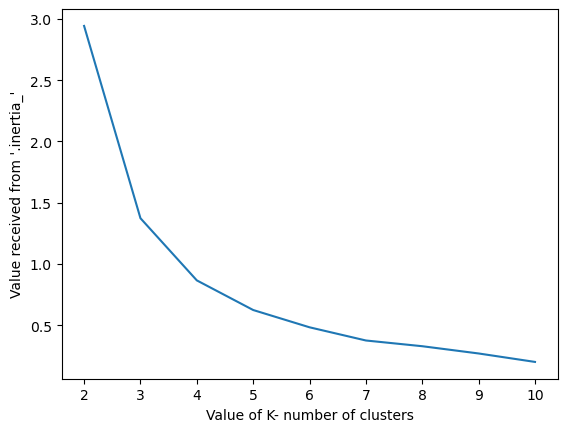

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\sit

For clusters = 2 , the silhouette score is 58.04
For clusters = 2 , the davies bouldin score is 0.63
For clusters = 2 , the calinski harabasz score is 87.53

For clusters = 3 , the silhouette score is 59.05
For clusters = 3 , the davies bouldin score is 0.62
For clusters = 3 , the calinski harabasz score is 118.04

For clusters = 4 , the silhouette score is 54.81
For clusters = 4 , the davies bouldin score is 0.67
For clusters = 4 , the calinski harabasz score is 99.69

For clusters = 5 , the silhouette score is 51.61
For clusters = 5 , the davies bouldin score is 0.62
For clusters = 5 , the calinski harabasz score is 126.45

For clusters = 6 , the silhouette score is 52.08
For clusters = 6 , the davies bouldin score is 0.62
For clusters = 6 , the calinski harabasz score is 139.62

For clusters = 7 , the silhouette score is 53.46
For clusters = 7 , the davies bouldin score is 0.57
For clusters = 7 , the calinski harabasz score is 147.77

For clusters = 8 , the silhouette score is 48.47

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.5803791703116518
0.5958335187119874
0.5494661769968642


C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.5294955196184249
0.521240412352001


C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.4908427945256026
0.4928946178663069
0.4763308599373019


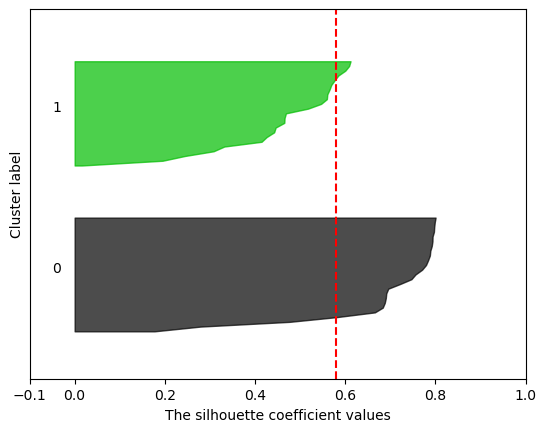

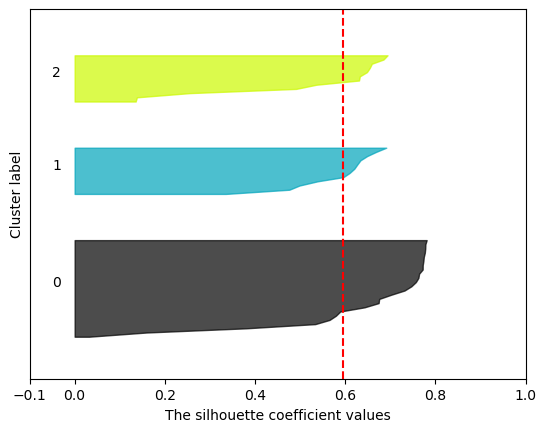

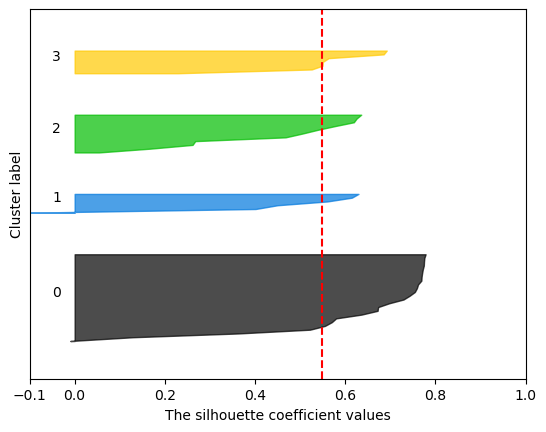

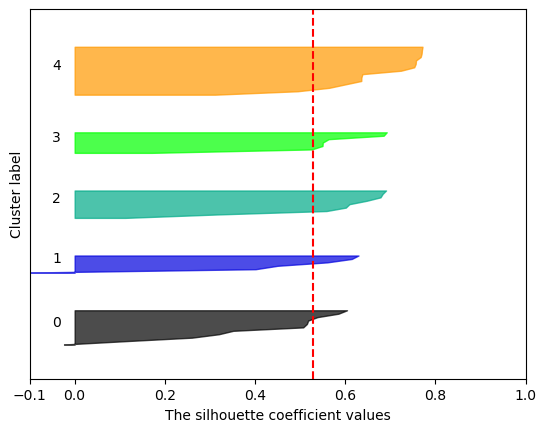

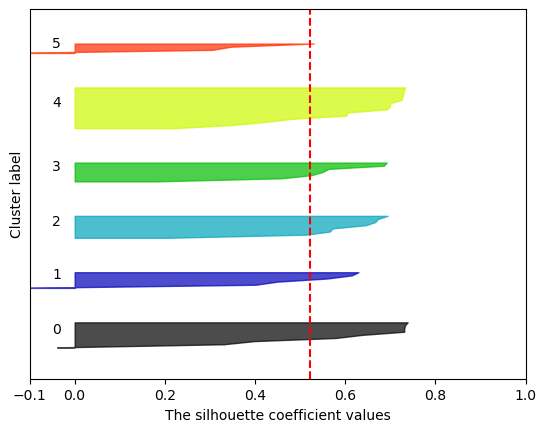

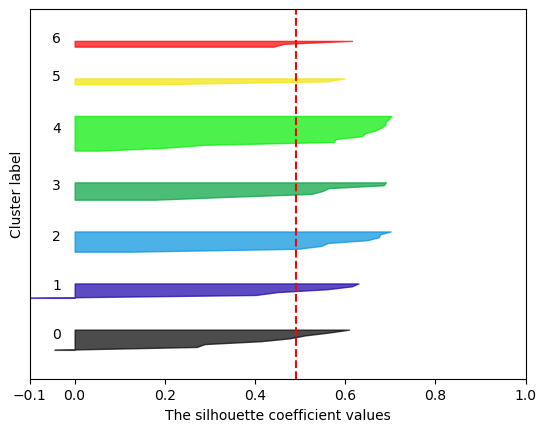

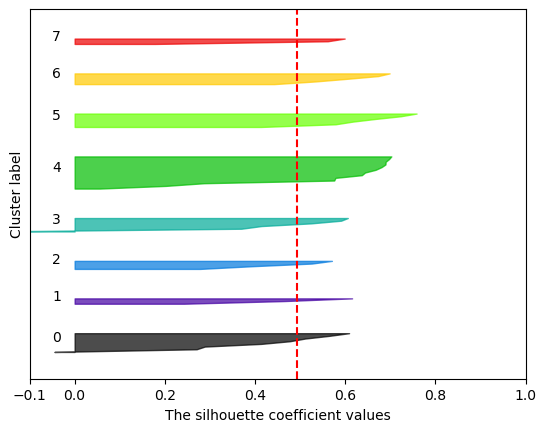

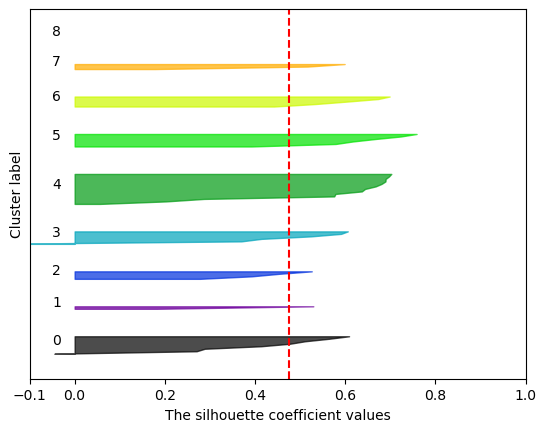

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


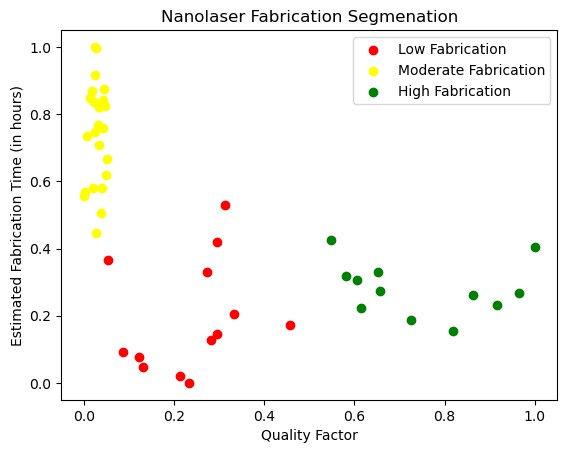

In [45]:
# Tasks 1-2 (Part 2): "quality_factor" vs. "estimated_fabrication_hours" Data

# K-Means Clustering
from sklearn.cluster import KMeans

X = np.array(no_outlier[["quality_factor", "estimated_fabrication_hours"]]).reshape(-1, 2)

err = []
my_cluster = np.arange(2, 11)
for k in my_cluster:
  temp = KMeans(n_clusters = k)
  temp.fit(X)
  err.append(temp.inertia_)  # '.inertia_' is provided to us in KMeans, it is the sum of squared distances of the samples.

# We will create an elbow curve to visualize data and find the most appropriate number of clusters.
plt.plot(my_cluster, err)
plt.xlabel("Value of K- number of clusters")
plt.ylabel("Value received from '.inertia_'")
plt.show()

# We will use other performance measures to see the appropriate number of clusters.
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

for j in my_cluster:
  temp_model = KMeans(n_clusters = j, random_state = 0)
  cluster_labels = temp_model.fit_predict(X)
  silhouette_avg = silhouette_score(X, cluster_labels) * 100
  print("For clusters =", j,",","the silhouette score is", round(silhouette_avg, 2))
  print("For clusters =", j,",","the davies bouldin score is", round(davies_bouldin_score(X, temp_model.labels_), 2))
  print("For clusters =", j,",","the calinski harabasz score is", round(calinski_harabasz_score(X, temp_model.labels_), 2))
  print()

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = range(2, 10)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical (v) line for average silhouette score of all the values
    sil_avg = silhouette_score(X, cluster_labels)
    print(sil_avg)
    ax1.axvline(x=sil_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

# Silhouette curve can help us find the suitable number of clusters.

# Let's finalize k=3, means that we need 3 groups.
# Apply KMeans
final_km = KMeans(n_clusters=3, random_state=0)
final_km.fit(X)
final_centroid = final_km.cluster_centers_
final_labels = final_km.labels_  # our final model

# Select relevant features for clustering
clustering_features = ["quality_factor", "estimated_fabrication_hours"]
clustering_data = no_outlier[clustering_features]

# Optional: scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(clustering_data)
clusters = final_km.fit_predict(X_scaled)

# Assign cluster labels
clustering_data = clustering_data.copy()
clustering_data['cluster'] = clusters

# Plot the clusters
segments = ["Low Fabrication", "Moderate Fabrication", "High Fabrication"]
colors = ["red", "yellow", "green"]

for i in range(3):
    plt.scatter(clustering_data.loc[clustering_data.cluster == i, "quality_factor"],
                clustering_data.loc[clustering_data.cluster == i, "estimated_fabrication_hours"],
                c=colors[i], label=segments[i])
plt.title("Nanolaser Fabrication Segmenation")
plt.xlabel("Quality Factor")
plt.ylabel("Estimated Fabrication Time (in hours)")
plt.legend()
plt.show()

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\sit

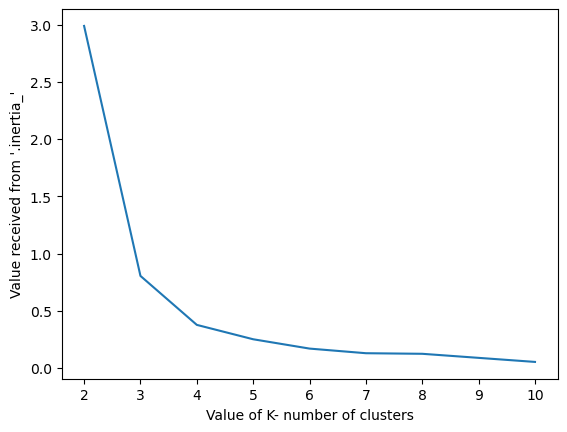

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\sit

For clusters = 2 , the silhouette score is 75.77
For clusters = 2 , the davies bouldin score is 0.32
For clusters = 2 , the calinski harabasz score is 189.23

For clusters = 3 , the silhouette score is 75.67
For clusters = 3 , the davies bouldin score is 0.34
For clusters = 3 , the calinski harabasz score is 400.26

For clusters = 4 , the silhouette score is 74.8
For clusters = 4 , the davies bouldin score is 0.32
For clusters = 4 , the calinski harabasz score is 580.85

For clusters = 5 , the silhouette score is 62.66
For clusters = 5 , the davies bouldin score is 0.46
For clusters = 5 , the calinski harabasz score is 655.8

For clusters = 6 , the silhouette score is 64.15
For clusters = 6 , the davies bouldin score is 0.43
For clusters = 6 , the calinski harabasz score is 607.14

For clusters = 7 , the silhouette score is 60.93
For clusters = 7 , the davies bouldin score is 0.45
For clusters = 7 , the calinski harabasz score is 739.76

For clusters = 8 , the silhouette score is 62.71

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\sit

0.7577486957780479
0.7715666346339628
0.7480433513105248
0.7158490571139228
0.6909022616585437


C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.585232275643995
0.6338196463922842
0.6332332191050115


C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


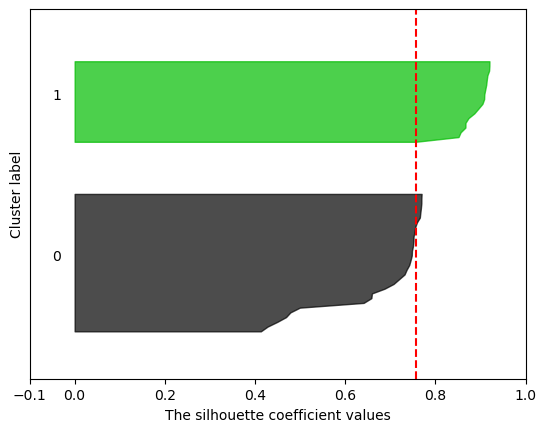

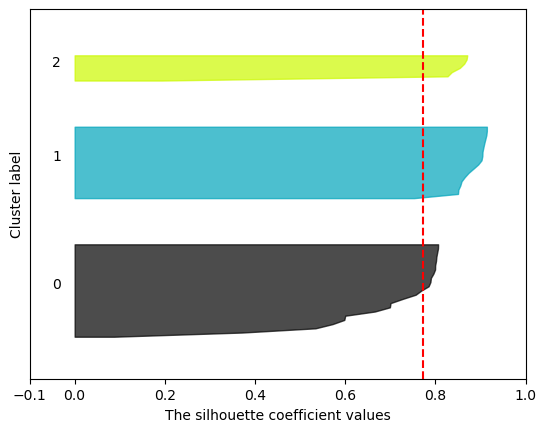

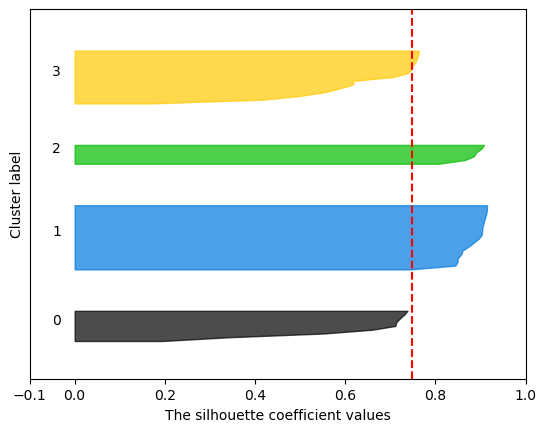

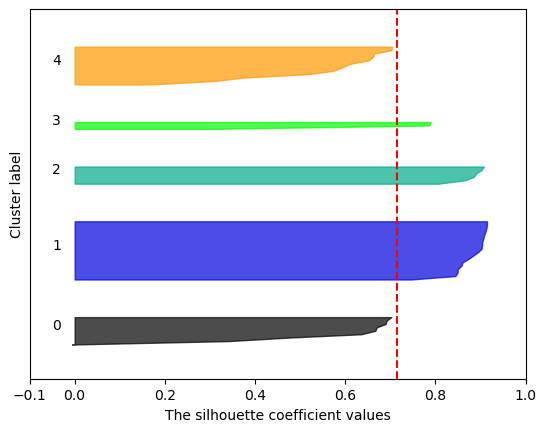

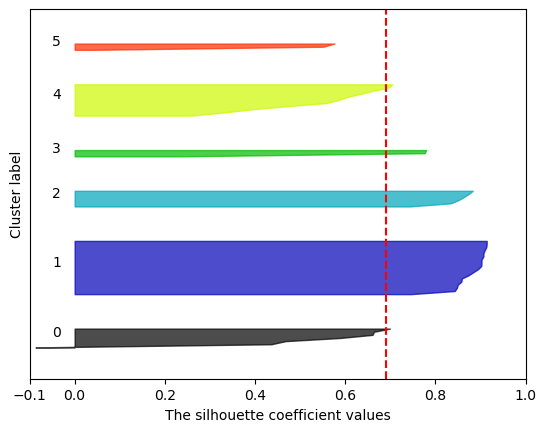

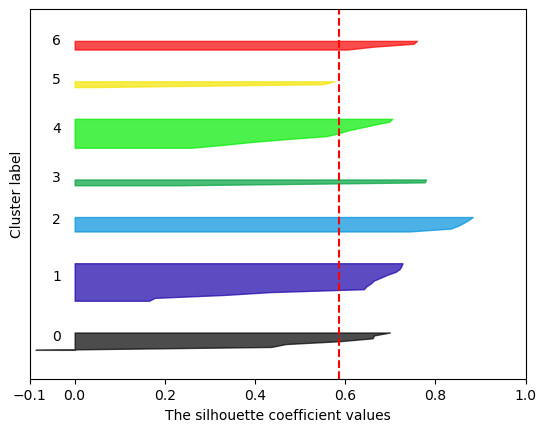

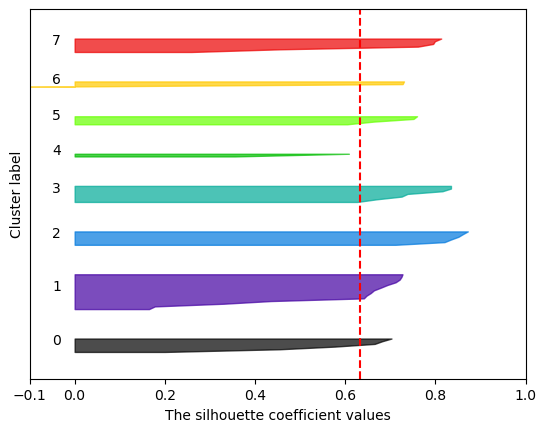

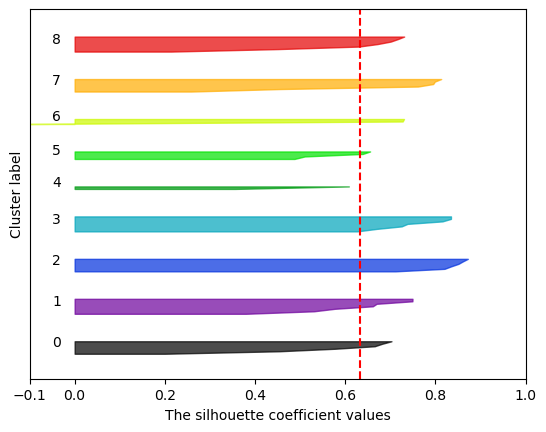

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


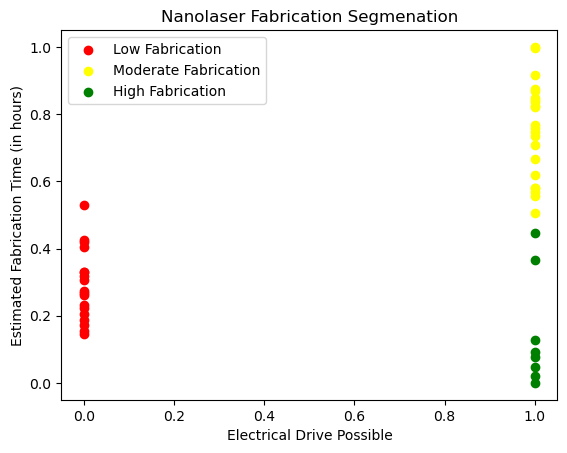

In [46]:
# Tasks 1-2 (Part 3): "electrical_drive_possible" vs. "estimated_fabrication_hours" Data

# K-Means Clustering
from sklearn.cluster import KMeans

X = np.array(no_outlier[["electrical_drive_possible", "estimated_fabrication_hours"]]).reshape(-1, 2)

err = []
my_cluster = np.arange(2, 11)
for k in my_cluster:
  temp = KMeans(n_clusters = k)
  temp.fit(X)
  err.append(temp.inertia_)  # '.inertia_' is provided to us in KMeans, it is the sum of squared distances of the samples.

# We will create an elbow curve to visualize data and find the most appropriate number of clusters.
plt.plot(my_cluster, err)
plt.xlabel("Value of K- number of clusters")
plt.ylabel("Value received from '.inertia_'")
plt.show()

# We will use other performance measures to see the appropriate number of clusters.
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

for j in my_cluster:
  temp_model = KMeans(n_clusters = j, random_state = 0)
  cluster_labels = temp_model.fit_predict(X)
  silhouette_avg = silhouette_score(X, cluster_labels) * 100
  print("For clusters =", j,",","the silhouette score is", round(silhouette_avg, 2))
  print("For clusters =", j,",","the davies bouldin score is", round(davies_bouldin_score(X, temp_model.labels_), 2))
  print("For clusters =", j,",","the calinski harabasz score is", round(calinski_harabasz_score(X, temp_model.labels_), 2))
  print()

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = range(2, 10)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical (v) line for average silhouette score of all the values
    sil_avg = silhouette_score(X, cluster_labels)
    print(sil_avg)
    ax1.axvline(x=sil_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

# Silhouette curve can help us find the suitable number of clusters.

# Let's finalize k=3, means that we need 3 groups.
# Apply KMeans
final_km = KMeans(n_clusters=3, random_state=0)
final_km.fit(X)
final_centroid = final_km.cluster_centers_
final_labels = final_km.labels_  # our final model

# Select relevant features for clustering
clustering_features = ["electrical_drive_possible", "estimated_fabrication_hours"]
clustering_data = no_outlier[clustering_features]

# Optional: scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(clustering_data)
clusters = final_km.fit_predict(X_scaled)

# Assign cluster labels
clustering_data = clustering_data.copy()
clustering_data['cluster'] = clusters

# Plot the clusters
segments = ["Low Fabrication", "Moderate Fabrication", "High Fabrication"]
colors = ["red", "yellow", "green"]

for i in range(3):
    plt.scatter(clustering_data.loc[clustering_data.cluster == i, "electrical_drive_possible"],
                clustering_data.loc[clustering_data.cluster == i, "estimated_fabrication_hours"],
                c=colors[i], label=segments[i])
plt.title("Nanolaser Fabrication Segmenation")
plt.xlabel("Electrical Drive Possible")
plt.ylabel("Estimated Fabrication Time (in hours)")
plt.legend()
plt.show()

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\sit

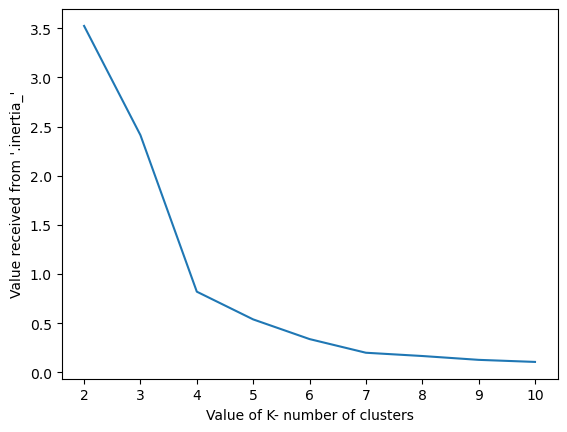

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\sit

For clusters = 2 , the silhouette score is 71.79
For clusters = 2 , the davies bouldin score is 0.44
For clusters = 2 , the calinski harabasz score is 153.56

For clusters = 3 , the silhouette score is 72.14
For clusters = 3 , the davies bouldin score is 0.29
For clusters = 3 , the calinski harabasz score is 122.12

For clusters = 4 , the silhouette score is 69.9
For clusters = 4 , the davies bouldin score is 0.35
For clusters = 4 , the calinski harabasz score is 258.67

For clusters = 5 , the silhouette score is 60.35
For clusters = 5 , the davies bouldin score is 0.43
For clusters = 5 , the calinski harabasz score is 252.59

For clusters = 6 , the silhouette score is 57.76
For clusters = 6 , the davies bouldin score is 0.45
For clusters = 6 , the calinski harabasz score is 236.76

For clusters = 7 , the silhouette score is 57.5
For clusters = 7 , the davies bouldin score is 0.44
For clusters = 7 , the calinski harabasz score is 425.4

For clusters = 8 , the silhouette score is 58.68


C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.717875988670229
0.677076947207084
0.666485975203167


C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.696492644939763
0.6008862968087585
0.6196931332132354


C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.5782955607980322
0.5460893684592851


C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


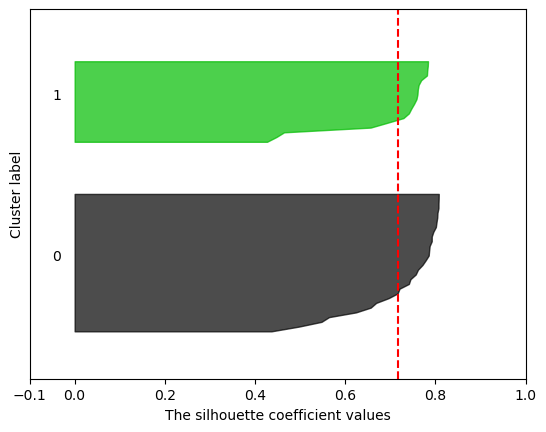

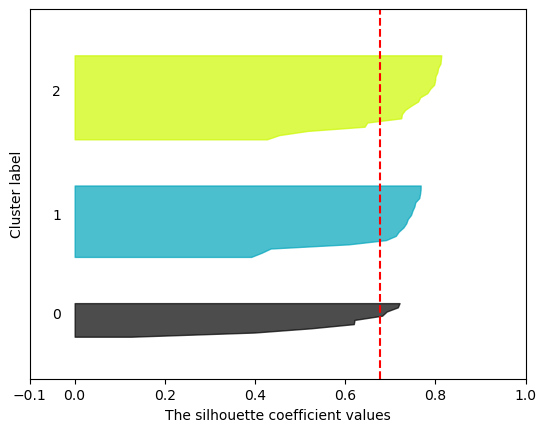

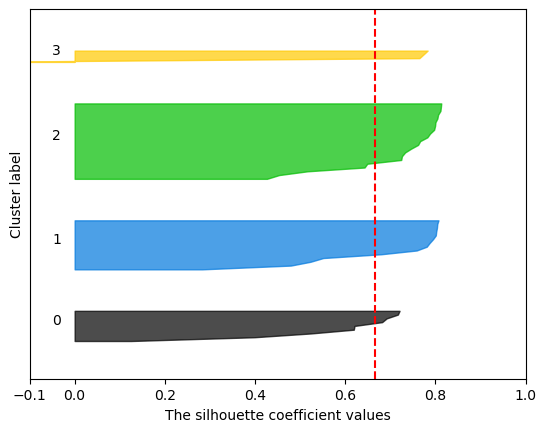

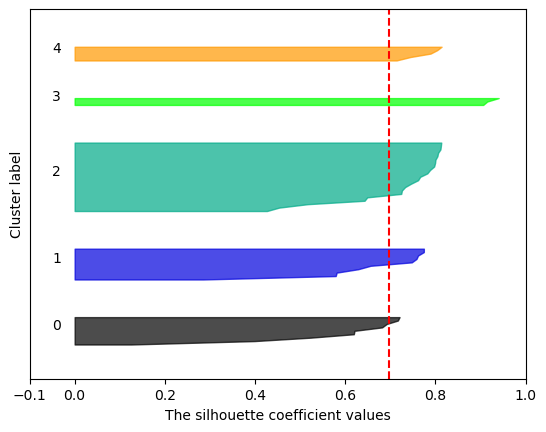

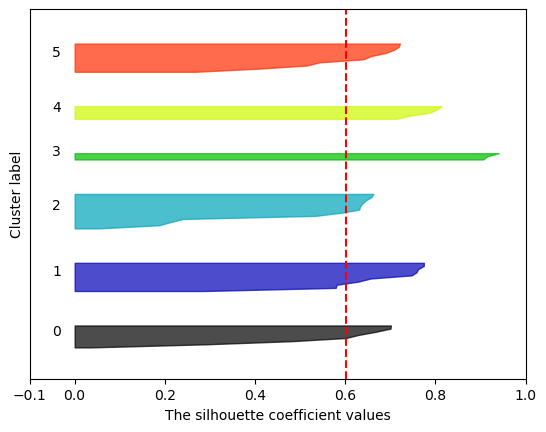

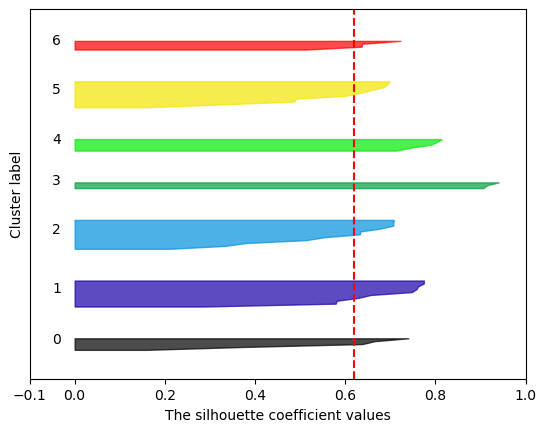

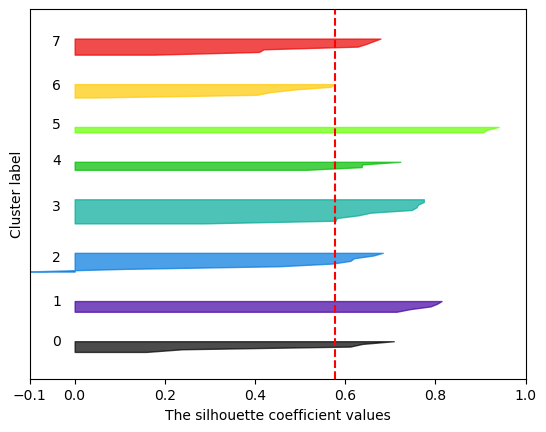

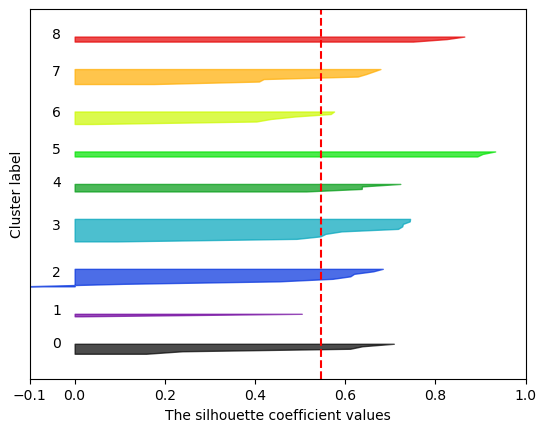

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


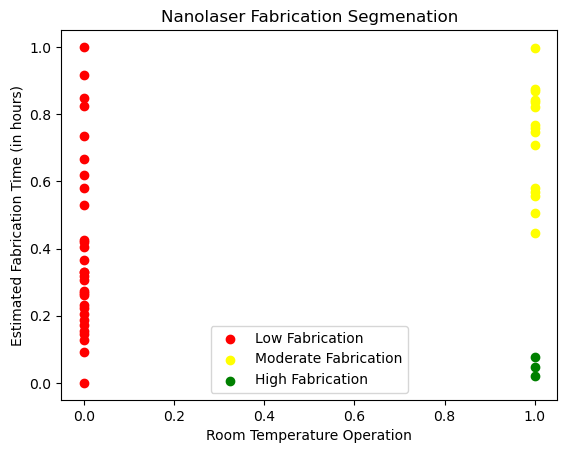

In [47]:
# Tasks 1-2 (Part 4): "room_temp_operation" vs. "estimated_fabrication_hours" Data

# K-Means Clustering
from sklearn.cluster import KMeans

X = np.array(no_outlier[["room_temp_operation", "estimated_fabrication_hours"]]).reshape(-1, 2)

err = []
my_cluster = np.arange(2, 11)
for k in my_cluster:
  temp = KMeans(n_clusters = k)
  temp.fit(X)
  err.append(temp.inertia_)  # '.inertia_' is provided to us in KMeans, it is the sum of squared distances of the samples.

# We will create an elbow curve to visualize data and find the most appropriate number of clusters.
plt.plot(my_cluster, err)
plt.xlabel("Value of K- number of clusters")
plt.ylabel("Value received from '.inertia_'")
plt.show()

# We will use other performance measures to see the appropriate number of clusters.
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

for j in my_cluster:
  temp_model = KMeans(n_clusters = j, random_state = 0)
  cluster_labels = temp_model.fit_predict(X)
  silhouette_avg = silhouette_score(X, cluster_labels) * 100
  print("For clusters =", j,",","the silhouette score is", round(silhouette_avg, 2))
  print("For clusters =", j,",","the davies bouldin score is", round(davies_bouldin_score(X, temp_model.labels_), 2))
  print("For clusters =", j,",","the calinski harabasz score is", round(calinski_harabasz_score(X, temp_model.labels_), 2))
  print()

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = range(2, 10)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical (v) line for average silhouette score of all the values
    sil_avg = silhouette_score(X, cluster_labels)
    print(sil_avg)
    ax1.axvline(x=sil_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

# Silhouette curve can help us find the suitable number of clusters.

# Let's finalize k=3, means that we need 3 groups.
# Apply KMeans
final_km = KMeans(n_clusters=3, random_state=0)
final_km.fit(X)
final_centroid = final_km.cluster_centers_
final_labels = final_km.labels_  # our final model

# Select relevant features for clustering
clustering_features = ["room_temp_operation", "estimated_fabrication_hours"]
clustering_data = no_outlier[clustering_features]

# Optional: scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(clustering_data)
clusters = final_km.fit_predict(X_scaled)

# Assign cluster labels
clustering_data = clustering_data.copy()
clustering_data['cluster'] = clusters

# Plot the clusters
segments = ["Low Fabrication", "Moderate Fabrication", "High Fabrication"]
colors = ["red", "yellow", "green"]

for i in range(3):
    plt.scatter(clustering_data.loc[clustering_data.cluster == i, "room_temp_operation"],
                clustering_data.loc[clustering_data.cluster == i, "estimated_fabrication_hours"],
                c=colors[i], label=segments[i])
plt.title("Nanolaser Fabrication Segmenation")
plt.xlabel("Room Temperature Operation")
plt.ylabel("Estimated Fabrication Time (in hours)")
plt.legend()
plt.show()

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\sit

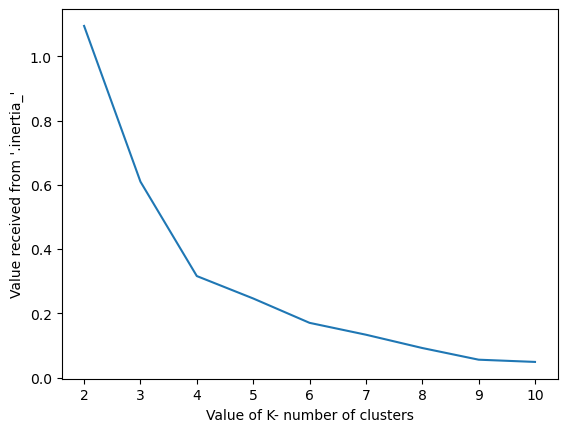

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\sit

For clusters = 2 , the silhouette score is 84.19
For clusters = 2 , the davies bouldin score is 0.22
For clusters = 2 , the calinski harabasz score is 627.82

For clusters = 3 , the silhouette score is 68.1
For clusters = 3 , the davies bouldin score is 0.46
For clusters = 3 , the calinski harabasz score is 428.01

For clusters = 4 , the silhouette score is 58.55
For clusters = 4 , the davies bouldin score is 0.53
For clusters = 4 , the calinski harabasz score is 729.62

For clusters = 5 , the silhouette score is 54.63
For clusters = 5 , the davies bouldin score is 0.51
For clusters = 5 , the calinski harabasz score is 644.33

For clusters = 6 , the silhouette score is 51.33
For clusters = 6 , the davies bouldin score is 0.55
For clusters = 6 , the calinski harabasz score is 657.7

For clusters = 7 , the silhouette score is 47.55
For clusters = 7 , the davies bouldin score is 0.55
For clusters = 7 , the calinski harabasz score is 804.91

For clusters = 8 , the silhouette score is 54.82

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\sit

0.5490117899812635
0.524554578495383
0.5265463473620943


C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.5684087644855041
0.5744005453911646


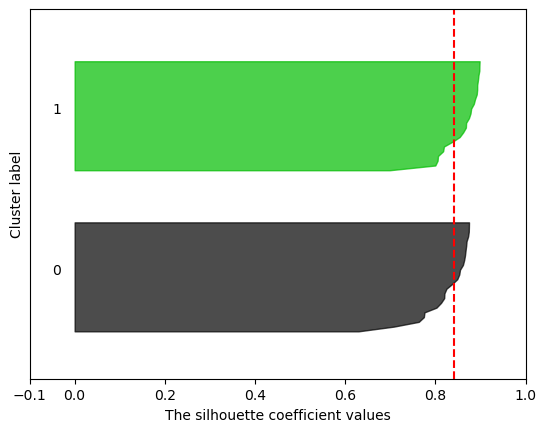

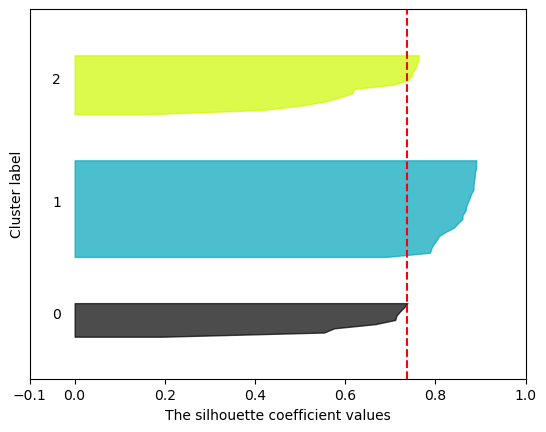

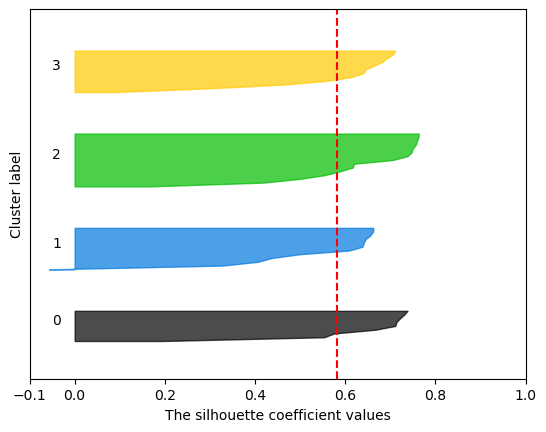

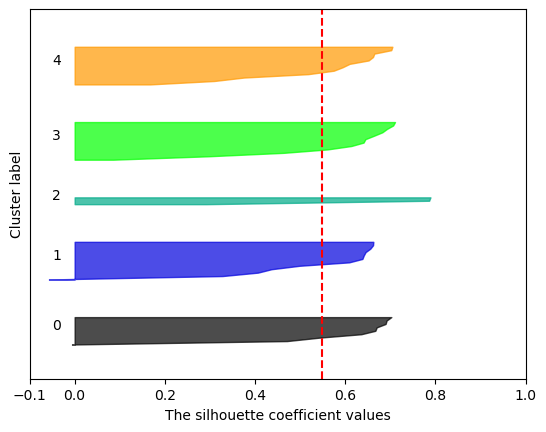

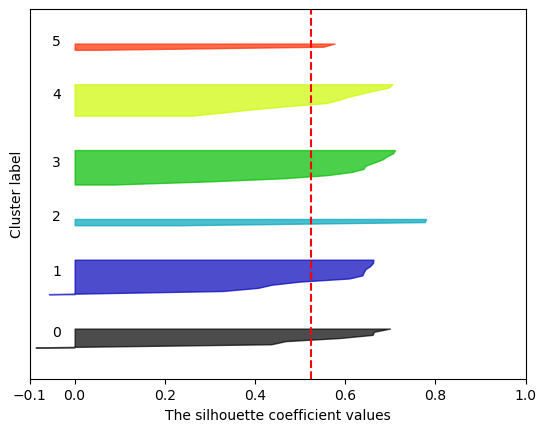

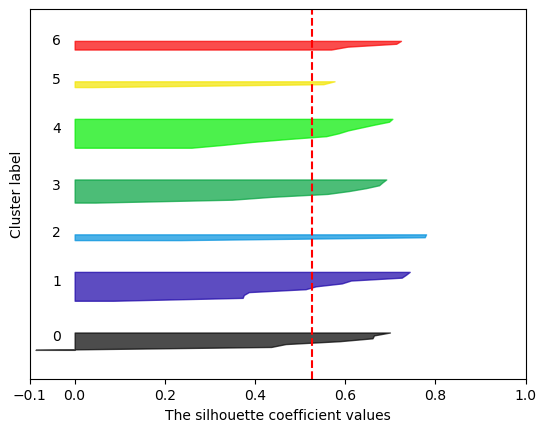

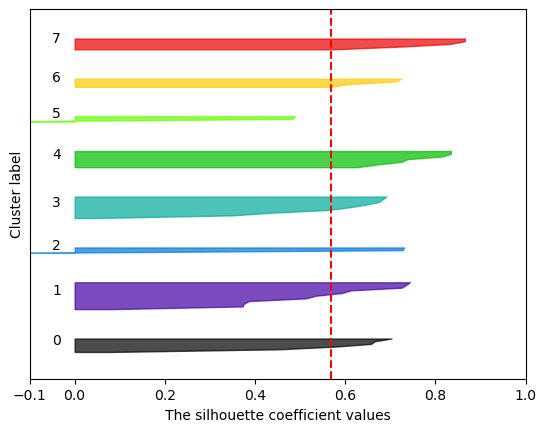

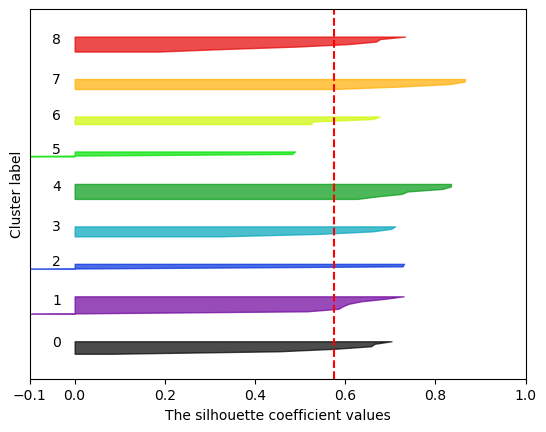

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


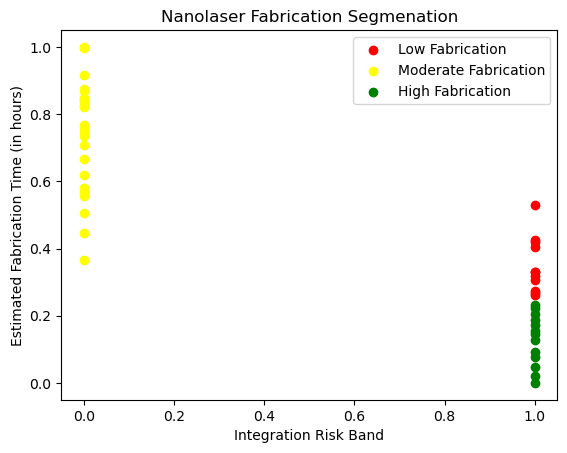

In [48]:
# Tasks 1-2 (Part 5): "integration_risk_band" vs. "estimated_fabrication_hours" Data

# K-Means Clustering
from sklearn.cluster import KMeans

X = np.array(no_outlier[["integration_risk_band", "estimated_fabrication_hours"]]).reshape(-1, 2)

err = []
my_cluster = np.arange(2, 11)
for k in my_cluster:
  temp = KMeans(n_clusters = k)
  temp.fit(X)
  err.append(temp.inertia_)  # '.inertia_' is provided to us in KMeans, it is the sum of squared distances of the samples.

# We will create an elbow curve to visualize data and find the most appropriate number of clusters.
plt.plot(my_cluster, err)
plt.xlabel("Value of K- number of clusters")
plt.ylabel("Value received from '.inertia_'")
plt.show()

# We will use other performance measures to see the appropriate number of clusters.
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

for j in my_cluster:
  temp_model = KMeans(n_clusters = j, random_state = 0)
  cluster_labels = temp_model.fit_predict(X)
  silhouette_avg = silhouette_score(X, cluster_labels) * 100
  print("For clusters =", j,",","the silhouette score is", round(silhouette_avg, 2))
  print("For clusters =", j,",","the davies bouldin score is", round(davies_bouldin_score(X, temp_model.labels_), 2))
  print("For clusters =", j,",","the calinski harabasz score is", round(calinski_harabasz_score(X, temp_model.labels_), 2))
  print()

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = range(2, 10)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical (v) line for average silhouette score of all the values
    sil_avg = silhouette_score(X, cluster_labels)
    print(sil_avg)
    ax1.axvline(x=sil_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

# Silhouette curve can help us find the suitable number of clusters.

# Let's finalize k=3, means that we need 3 groups.
# Apply KMeans
final_km = KMeans(n_clusters=3, random_state=0)
final_km.fit(X)
final_centroid = final_km.cluster_centers_
final_labels = final_km.labels_  # our final model

# Select relevant features for clustering
clustering_features = ["integration_risk_band", "estimated_fabrication_hours"]
clustering_data = no_outlier[clustering_features]

# Optional: scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(clustering_data)
clusters = final_km.fit_predict(X_scaled)

# Assign cluster labels
clustering_data = clustering_data.copy()
clustering_data['cluster'] = clusters

# Plot the clusters
segments = ["Low Fabrication", "Moderate Fabrication", "High Fabrication"]
colors = ["red", "yellow", "green"]

for i in range(3):
    plt.scatter(clustering_data.loc[clustering_data.cluster == i, "integration_risk_band"],
                clustering_data.loc[clustering_data.cluster == i, "estimated_fabrication_hours"],
                c=colors[i], label=segments[i])
plt.title("Nanolaser Fabrication Segmenation")
plt.xlabel("Integration Risk Band")
plt.ylabel("Estimated Fabrication Time (in hours)")
plt.legend()
plt.show()